In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import optuna
import os
import pytorch_lightning as pl
import yaml

from Data.Drosophilla.FlyDataMod import FlyDataModule
from IPython.core.debugger import set_trace
from Models import Transformer as tr
from torch import nn as nn
from Utils import callbacks as cb
from Utils import evaluations as ev
from Utils import HyperParams as hp
from Utils import loggers as lg

np.random.seed(0)

In [2]:
def runTransformer_Exp(
    trial,
    label_type,
    label_val,
    lr,
    batch_size,
    ntoken,
    ninp,
    nhead,
    nhid,
    nlayers,
    dropout,
    data_win_radius=5):
    logger = lg.DictLogger(trial.number,
                          root_dir)
    trainer = pl.Trainer(
            gpus=1,
            logger=logger,
            max_epochs=50,
            callbacks=[cb.getcb()],
            default_root_dir=root_dir)
    dm      = FlyDataModule(cell_line="S2",
                           data_win_radius=data_win_radius,
                           batch_size=batch_size,
                           label_type=label_type,
                           label_val=label_val)
    dm.setup()
    
    hparams={'cell_line':'S2',
            "data_win_radius":data_win_radius,
            "label_type":label_type,
            "batch_size":batch_size}
    
    model_trans = tr.TransformerModule(
            ntoken=ntoken,
            ninp=ninp,
            nhead=nhead,
            nhid=nhid,
            nlayers=nlayers,
            dropout=dropout,
            loss_type="mse",
            lr=lr,
            hparams=hparams)
    model_trans.cuda()
    trainer.fit(model_trans, dm)
    score = logger.metrics[-1]['val weighted mse loss']
    if np.isnan(score):
        score=9999999
    return score

def objective(trial):
    lr          = trial.suggest_categorical("lr", [1e-4, 1e-3, 1e-2, 1e-1])
    batch_size  = trial.suggest_categorical("batch_size", [1,4,16,64]) 
    num_layers  = trial.suggest_categorical("num_layers", [1,2,3,4,5,6]) 
    dropout     = trial.suggest_categorical("dropout", [0,0.1,0.2,0.3]) 
    nhid        = trial.suggest_categorical("nhid", [512,1024,2048])
    print(lr, batch_size, num_layers, dropout)
    return runTransformer_Exp(
            trial=trial,
            label_type=label_type,
            label_val=label_val,
            lr=lr,
            batch_size=batch_size,
            ntoken=1,
            ninp=29,
            nhead=7,
            nhid=nhid,
            nlayers=num_layers,
            dropout=dropout)

In [3]:
label_type = "insulation"
label_val  = 3
root_dir   = "Experiments/Table_2_Transformer_Tunning_Insulation"
if not os.path.isdir(root_dir):
    os.mkdir(root_dir)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
hp.save_hyperparams(root_dir,
                    study.best_trial.number)

[I 2021-04-24 23:43:16,728] A new study created in memory with name: no-name-0851e57d-fcb5-44e3-a598-aae89bde8202


0.01 64 3 0.1


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 334 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
334 K     Trainable params
0         Non-trainable params
334 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 23:44:08,983] Trial 0 finished with value: 0.09524133056402206 and parameters: {'lr': 0.01, 'batch_size': 64, 'num_layers': 3, 'dropout': 0.1, 'nhid': 1024}. Best is trial 0 with value: 0.09524133056402206.


0.001 1 6 0


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 1.3 M 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:09:13,717] Trial 1 finished with value: 0.09516385197639465 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 6, 'dropout': 0, 'nhid': 2048}. Best is trial 1 with value: 0.09516385197639465.


0.001 64 5 0.2


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 1.1 M 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:09:30,295] Trial 2 finished with value: 0.09561994671821594 and parameters: {'lr': 0.001, 'batch_size': 64, 'num_layers': 5, 'dropout': 0.2, 'nhid': 2048}. Best is trial 1 with value: 0.09516385197639465.


0.001 4 2 0


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 121 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
121 K     Trainable params
0         Non-trainable params
121 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:11:05,810] Trial 3 finished with value: 0.09675126522779465 and parameters: {'lr': 0.001, 'batch_size': 4, 'num_layers': 2, 'dropout': 0, 'nhid': 512}. Best is trial 1 with value: 0.09516385197639465.


0.1 64 5 0.1


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 303 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
303 K     Trainable params
0         Non-trainable params
303 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:11:37,523] Trial 4 finished with value: 0.09654410928487778 and parameters: {'lr': 0.1, 'batch_size': 64, 'num_layers': 5, 'dropout': 0.1, 'nhid': 512}. Best is trial 1 with value: 0.09516385197639465.


0.1 4 5 0.2


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 303 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
303 K     Trainable params
0         Non-trainable params
303 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:13:53,299] Trial 5 finished with value: 0.1380559355020523 and parameters: {'lr': 0.1, 'batch_size': 4, 'num_layers': 5, 'dropout': 0.2, 'nhid': 512}. Best is trial 1 with value: 0.09516385197639465.


0.0001 16 6 0


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:16:09,662] Trial 6 finished with value: 0.0965108722448349 and parameters: {'lr': 0.0001, 'batch_size': 16, 'num_layers': 6, 'dropout': 0, 'nhid': 512}. Best is trial 1 with value: 0.09516385197639465.


0.0001 4 3 0


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 638 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
638 K     Trainable params
0         Non-trainable params
638 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:23:23,447] Trial 7 finished with value: 0.09426827728748322 and parameters: {'lr': 0.0001, 'batch_size': 4, 'num_layers': 3, 'dropout': 0, 'nhid': 2048}. Best is trial 7 with value: 0.09426827728748322.


0.001 4 6 0


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 1.3 M 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:25:33,313] Trial 8 finished with value: 0.09518752992153168 and parameters: {'lr': 0.001, 'batch_size': 4, 'num_layers': 6, 'dropout': 0, 'nhid': 2048}. Best is trial 7 with value: 0.09426827728748322.


0.0001 16 5 0.3


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
init
logging them hyperparams:Experiments/Table_2_Transformer_Tunning_Insulation



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 303 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
303 K     Trainable params
0         Non-trainable params
303 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-25 00:26:08,957] Trial 9 finished with value: 0.09768892824649811 and parameters: {'lr': 0.0001, 'batch_size': 16, 'num_layers': 5, 'dropout': 0.3, 'nhid': 512}. Best is trial 7 with value: 0.09426827728748322.


Everything set
init
init
init
init
init
init
init
init
init
init


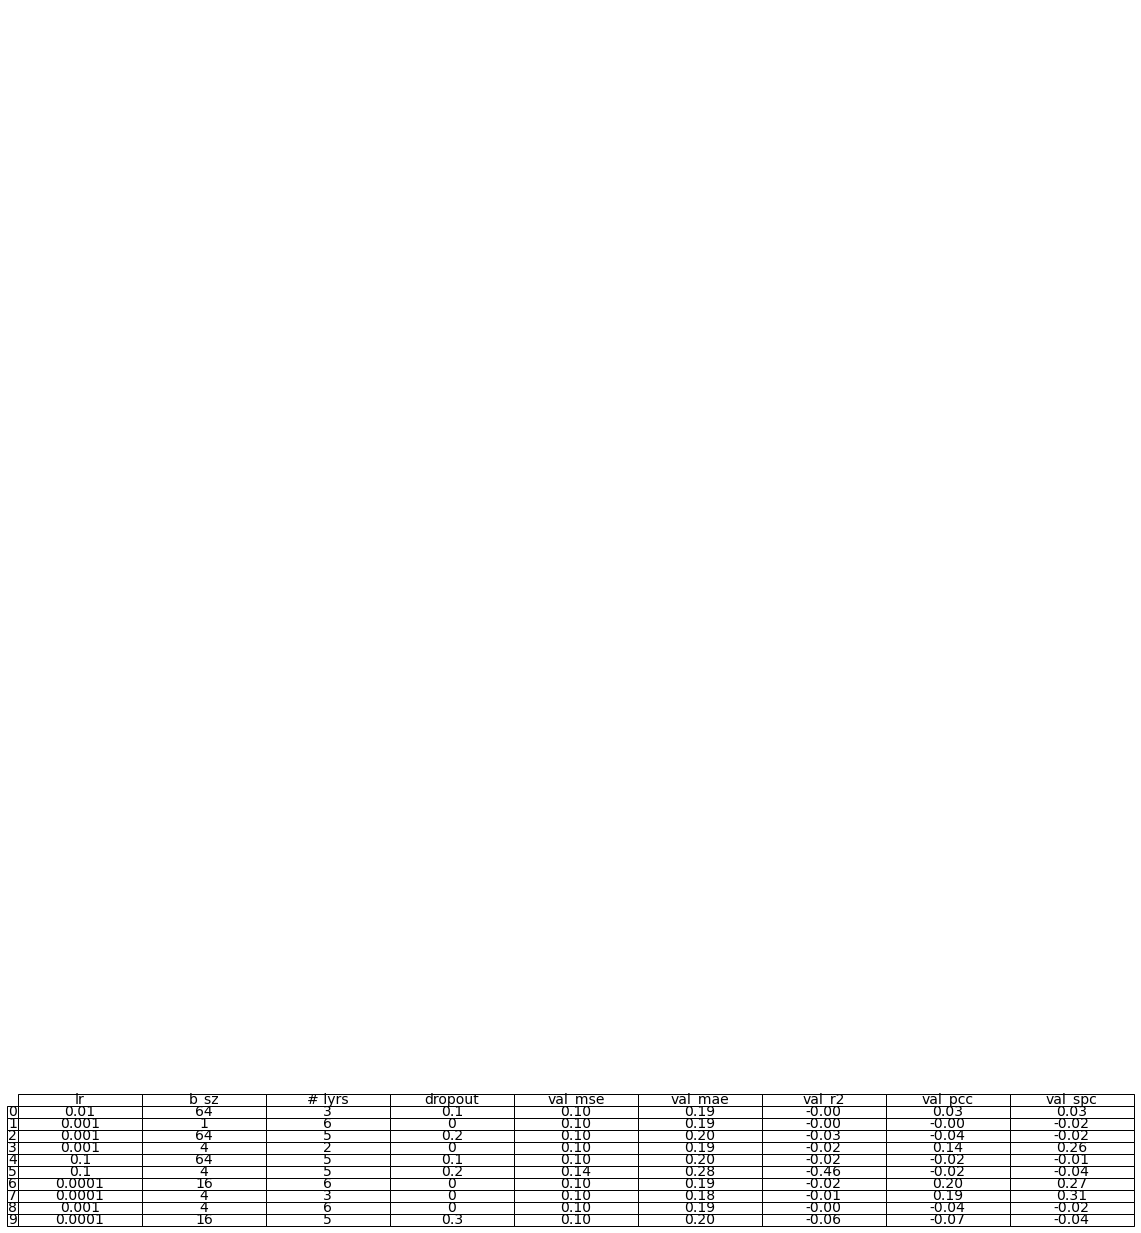

In [4]:
label_type = "insulation"
label_val  = 3
root_dir   = "Experiments/Table_2_Transformer_Tunning_Insulation"
dm         = FlyDataModule(cell_line="S2",
                          data_win_radius=5,
                          batch_size=1,
                          label_type=label_type,
                          label_val=label_val)
dm.setup()
vals=[]

exps = sorted(glob.glob(root_dir+"/optuna/*"))
for e, exp in enumerate(exps):
    layer_weights = glob.glob(exp+"/checkpoints/*")[0]
    hparams       = yaml.full_load(open(glob.glob(exp+"/hparams.yaml")[0]))
    model         = tr.TransformerModule.load_from_checkpoint(layer_weights).to("cuda:0")
    row           = []
    row.append(hparams['lr'])
    row.append(hparams['hparams']['batch_size'])
    row.append(hparams['nlayers'])
    row.append(hparams['dropout'])
    mm            = ev.getModelMetrics(model, dm, 'val').values()
    fmm           = list(map(lambda x: "{:.2f}".format(x), mm ))
    row.extend(fmm)
    vals.append(row)
cols = ['lr','b_sz', '# lyrs', 'dropout','val_mse','val_mae','val_r2','val_pcc','val_spc']
fig, ax = plt.subplots(1, figsize=(20,20))
table   = ax.table(vals,
                  cellLoc="center",
                  colLabels=cols,
                  rowLabels=list(range(0, len(exps))))
table.set_fontsize(14)
ax.axis('off')
plt.show()

Everything set
Experiments/Table_2_Transformer_Tunning_Insulation/optuna/version_6/checkpoints/epoch=12-step=3223.ckpt
init


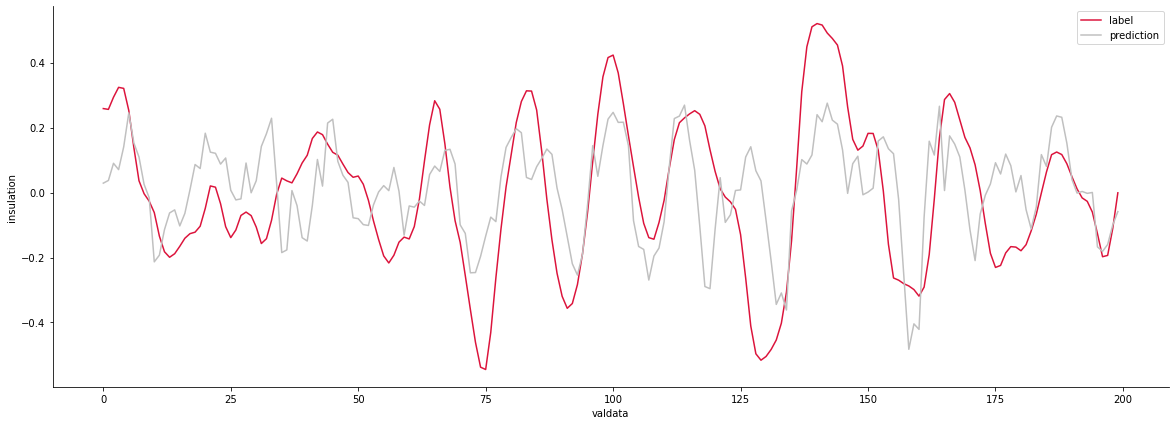

In [11]:
dm = FlyDataModule(cell_line="S2",
                  data_win_radius=5,
                  batch_size=1,
                  label_type="insulation",
                  label_val=3)
dm.setup()
layer_weights = glob.glob("Experiments/Table_2_Transformer_Tunning_Insulation/optuna/version_6/checkpoints/*")[0]
print(layer_weights)
model         = tr.TransformerModule.load_from_checkpoint(layer_weights).to("cuda:0")
ev.createPlot(model, dm, "val", "idk")

In [6]:
#to csv
import pandas as pd
ar_val   = np.array(vals)
ar_col   = np.expand_dims(np.array(cols),0)
csv_data = np.vstack((ar_col, ar_val))
pd.DataFrame(csv_data).to_csv("Experiments/Table_2_Transformer_Tunning_Insulation/Sup_2_Results.csv")